# KNN Algorithm

### Problem Statement:- 

    - Implement a KNN model to classify the animals in to categories. 

### Data understanding and Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
zoo = pd.read_csv ("~/desktop/Digi 360/Module 18/zoo.csv",encoding='mac_roman')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# Checking null values

zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo .describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### Visualization

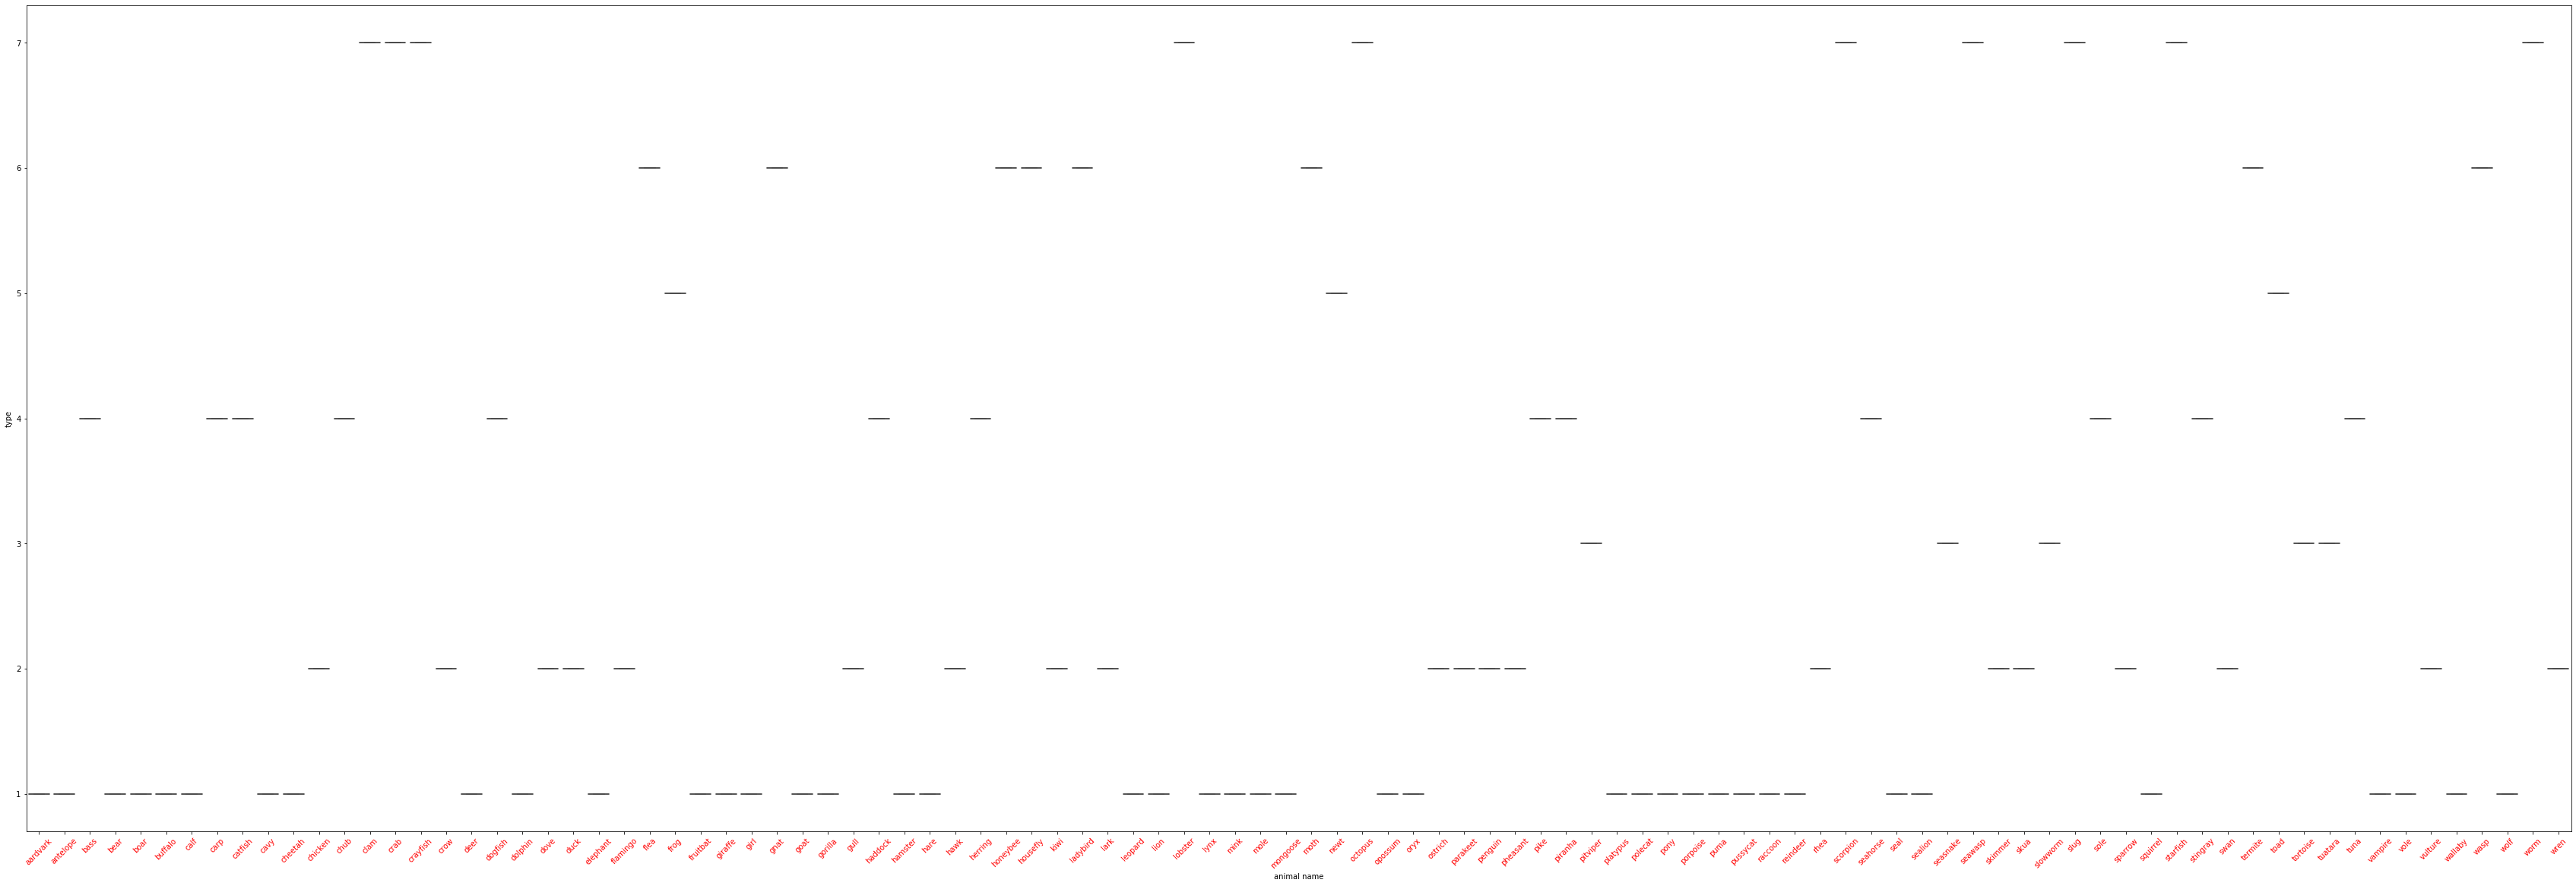

In [6]:
plt.figure(figsize = (60,20))

sns.boxplot(y='type',x='animal name',color='b', data=zoo)
plt.xticks(rotation=45, c='r')

plt.show()

### Splitting the dataset

In [7]:
#Let's drop the animal name from the datset.

zoo = zoo.drop('animal name', axis =1)

In [8]:
X = zoo.drop('type', axis=1)

In [9]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [10]:
y = zoo.pop('type')

In [11]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1


In [14]:
y_train.head()

52    5
48    1
38    4
78    2
95    2
Name: type, dtype: int64

### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Building the model

In [16]:
# for 3 nearest neighbours 
knn = KNC(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
# train accuracy 
train_acc = np.mean(knn.predict(X_train)==y_train)
train_acc

0.9875

In [18]:
# test accuracy 
test_acc = np.mean(knn.predict(X_test)==y_test)
test_acc

0.9047619047619048

In [19]:
# for 5 nearest neighbours 
knn = KNC(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
# train accuracy 
train_acc = np.mean(knn.predict(X_train)==y_train)
train_acc

0.975

In [21]:
# test accuracy 
test_acc = np.mean(knn.predict(X_test)==y_test)
test_acc

0.9047619047619048

In [22]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    knn = KNC(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc = np.mean(knn.predict(X_train)==y_train)
    test_acc = np.mean(knn.predict(X_test)==y_test)
    acc.append([train_acc,test_acc])

In [23]:
acc

[[0.9875, 0.9047619047619048],
 [0.975, 0.9047619047619048],
 [0.9375, 0.7619047619047619],
 [0.9125, 0.7142857142857143],
 [0.8625, 0.8095238095238095],
 [0.825, 0.7619047619047619],
 [0.85, 0.7619047619047619],
 [0.85, 0.7619047619047619],
 [0.85, 0.7619047619047619],
 [0.85, 0.7619047619047619],
 [0.85, 0.6666666666666666],
 [0.8125, 0.6666666666666666],
 [0.8, 0.6666666666666666],
 [0.775, 0.6666666666666666],
 [0.75, 0.6666666666666666],
 [0.75, 0.6666666666666666],
 [0.725, 0.6190476190476191],
 [0.6875, 0.5714285714285714],
 [0.675, 0.5238095238095238],
 [0.675, 0.5238095238095238],
 [0.6375, 0.5238095238095238],
 [0.5375, 0.5238095238095238],
 [0.525, 0.47619047619047616],
 [0.475, 0.38095238095238093]]

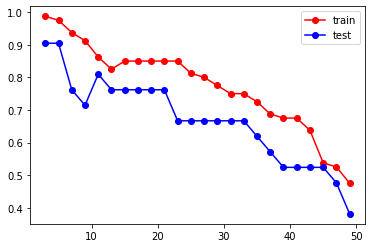

In [24]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")
plt.legend(["train","test"])
plt.show()

In [25]:
error = []

# Calculating error for K values between 1 and 40
for i in range(3, 50):
    knn = KNC(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

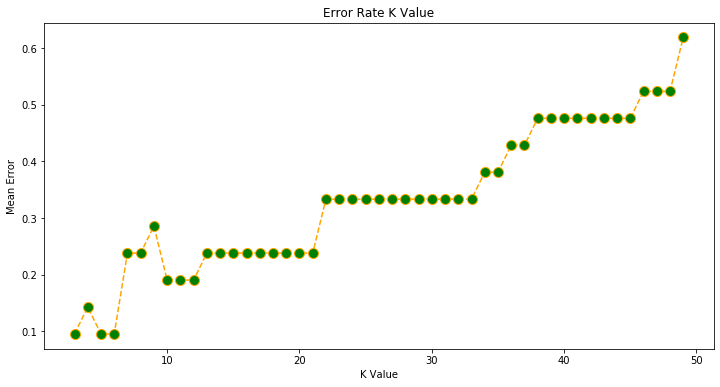

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(3, 50), error, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='g', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Conclusion:- 

    - The accuracy is high about 1% for the k value 4 or 5 or 6
    - We can see from above mean error plot that the error is minimum for value of K = 4 or 5 or 6.